# Morris Method for Monopile Turbine
This file is set up to explore sensitivity for 4 inputs:
- FA stiffness at base
- SS stiffness at base
- Wave Height
- Wave Direction

In [1]:
# For testing with active control of the blade pitch
from SALib.sample.morris.morris import sample
import numpy as np

# Define the model inputs
# recall that our model takes input vectors of the form:

# [wind_direction,wind_speed,blade_angle,air_density,erosion_blade1_region1,..._region6,
# erosion_blade2_region1,...,_region6,erosion_blade3_region1,..._region6]

problem = {
    'num_vars': 4,
    'names': ['FAstif', 'SSstif','WaveHeight','WaveDir'],
    'bounds': [[0,1],
               [0,1],
               [0,1],
               [0,1],
               ]
}

# N = number of trajectories to generate
N = 100;

# num_levels = number of partitions for the input dimensions
num_levels = 6;

# optimal trajectories
opt = 10;

# Generate samples
param_values = sample(problem, N, num_levels, opt)

# Save the outputs
np.savetxt("MorrisInputs.txt", param_values)

# Run this after Simulation
Do not re-run the above cell.

In [2]:
from SALib.analyze.morris import analyze
import pandas as pd
import numpy as np

problem = {
    'num_vars': 4,
    'names': ['FAstif', 'SSstif','WaveHeight','WaveDir'],
    'bounds': [[0,1],
               [0,1],
               [0,1],
               [0,1],
               ]
}

inputs = np.loadtxt("MorrisInputs.txt", float)

# Load in the corresponding Morris results file
morris_exp_data = pd.read_table("ExperimentResultTable.txt",delimiter = ',')

In [6]:
allnames = morris_exp_data.columns.tolist()
for i in range(200):
    print(6*i,allnames[6*i:6*i+6])


0 ['windfileID', 'N1FAS', 'N2FAS', 'N1SS', 'N2SS', 'waveMod']
6 ['waveHs', 'waveTp', 'waveDir', 'Timemean', 'Wind1VelXmean', 'Wind1VelYmean']
12 ['Wind1VelZmean', 'WindHubAngXYmean', 'Azimuthmean', 'BldPitch1mean', 'BldPitch2mean', 'BldPitch3mean']
18 ['GenSpeedmean', 'IPDefl1mean', 'LSSGagMyamean', 'LSSGagMzamean', 'LSSTipMysmean', 'LSSTipMzsmean']
24 ['LSShftFysmean', 'LSShftFzsmean', 'NacYawmean', 'NcIMUTAxsmean', 'NcIMUTAysmean', 'NcIMUTAzsmean']
30 ['PtfmHeavemean', 'PtfmPitchmean', 'PtfmRollmean', 'PtfmSurgemean', 'PtfmSwaymean', 'PtfmYawmean']
36 ['RotSpeedmean', 'RotThrustmean', 'RotTorqmean', 'TwrBsFxtmean', 'TwrBsFytmean', 'TwrBsFztmean']
42 ['TwrBsMxtmean', 'TwrBsMytmean', 'TwrBsMztmean', 'TwstDefl1mean', 'RtFldFxhmean', 'RtFldFyhmean']
48 ['RtFldFzhmean', 'RtFldMxhmean', 'RtFldMyhmean', 'RtFldMzhmean', 'RtVAvgxhmean', 'RtFldCpmean']
54 ['RtFldCtmean', 'RtAreamean', 'RtSpeedmean', 'RtTSRmean', 'AB1N001Vrelmean', 'AB1N002Vrelmean']
60 ['AB1N003Vrelmean', 'AB1N004Vrelmean', 'A

PtfmPitchmean
                      mu       mu_star         sigma  mu_star_conf
FAstif     -3.438451e-05  3.438451e-05  7.078557e-07  4.263334e-07
SSstif      1.680735e-06  1.680735e-06  6.775138e-07  3.712373e-07
WaveHeight -9.462961e-07  9.462961e-07  7.262160e-07  4.215512e-07
WaveDir    -1.987334e-08  2.971002e-07  4.157709e-07  1.701512e-07
*****************
Top 3 Influential Inputs
FAstif
SSstif
WaveHeight


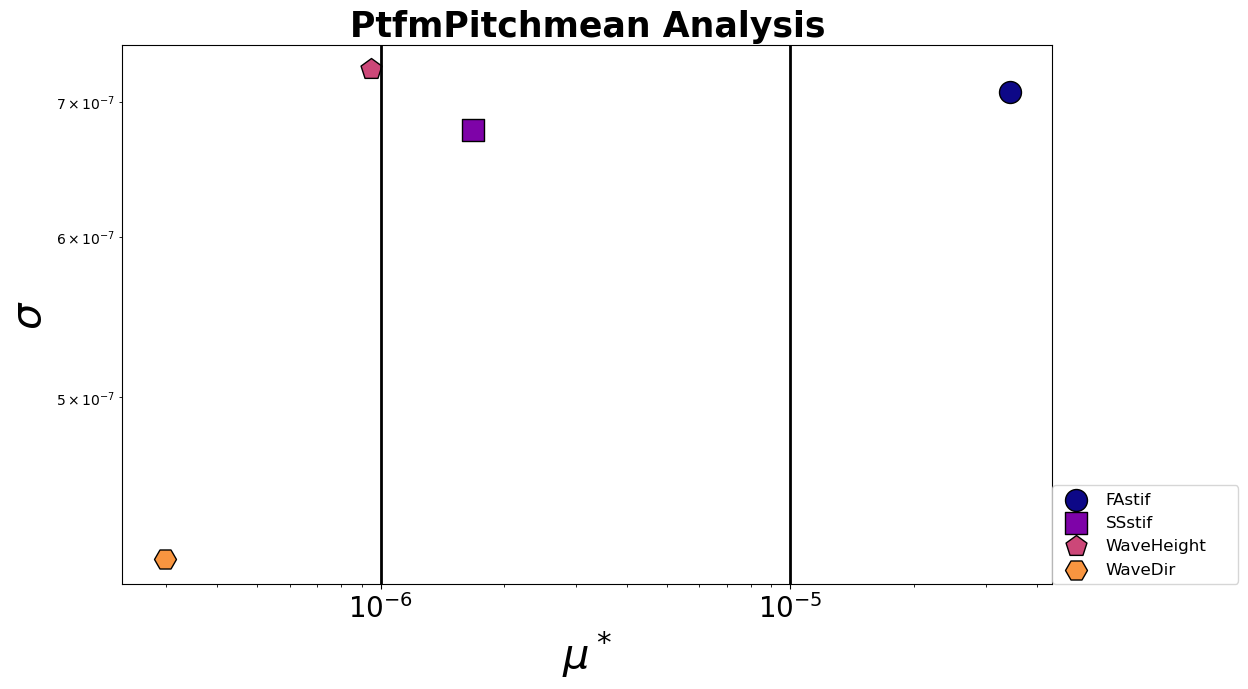

In [23]:
n = 31# This is for genpwr mean -> 658; 
# Output name
outname = allnames[n]
print(outname)
outputs = morris_exp_data[[allnames[n]]].to_numpy()

# Number of inputs
dim = np.shape(inputs)
dim = dim[1]

Si = analyze(problem, inputs, outputs, conf_level=0.95,
                    print_to_console=True, num_levels=4)

import matplotlib.pyplot as plt

# We want to plot the mu_star on the xaxis and the sigma on the y axis

# But first let's try something out...
stor = np.zeros((2,dim))
stor[0,:] = Si["mu_star"]
stor[1,:] = Si["sigma"]

vals = np.zeros((dim,))

for i in range(dim):
    vals[i] = np.linalg.norm(stor[:,i])
tempvals = vals

print("*****************")
print("Top 3 Influential Inputs")

# List off the top 3 influential inputs...
for j in range(3):
    ind = np.argmax(tempvals)
    print(Si["names"][ind])
    tempvals[ind] = 0
    
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

stor = np.zeros((2,dim))
stor[0,:] = Si["mu_star"]
stor[1,:] = Si["sigma"]

vals = np.zeros((dim,))
for i in range(dim):
    vals[i] = np.linalg.norm(stor[:,i])

cmap = plt.cm.plasma
norm = plt.Normalize(vmin=0, vmax=dim)
nomr1 = plt.Normalize(vmin=min(vals),vmax=max(vals))
plt.yscale("log")
plt.xscale("log")
ms = ["o","s","p","H","s","*","h","X","8","H","s","*","h","X","8","H","s","*","h","X","8"];
for i in range(len(Si["names"])):
    cl = cmap(norm(i))
    scale = 250 #400*nomr1(vals[i])
    ax.scatter(Si["mu_star"][i], Si["sigma"][i], marker = ms[i],color=cl, s=scale, label=Si["names"][i], edgecolors='black')
              
#ax.legend(loc="upper left")
ax.legend(bbox_to_anchor=(1,0,.2,2), loc='lower left',
           ncols=1,mode="expand", borderaxespad=0,fontsize=12)
ax.grid(True)
ax.set_xlabel("$\mu^*$",fontsize=30)
ax.set_ylabel("$\sigma$",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.grid(color='k', linewidth=2)
outname = outname+" Analysis"
ax.set_title(outname,fontsize = 25,fontweight = 'bold')
plt.show()